#### The dataset here is the Happiness score for different countries based on parameters like 'GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity' and 'Perceptions of corruption' for the years 2018 and 2019.

#### The objective here is to predict the Happiness score based on these factors.

#### Here I will testing the different ML models and will evaluate which model gives the best prediction.

#### The dataset for the year 2018 will be used for training the model and for testing I will be using the dataset for the year 2019

#### Link to the Dataset: https://www.kaggle.com/unsdsn/world-happiness

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df=pd.read_csv("C:/Users/dell/Desktop/Projects/World Happiness Report/2018.csv")

### Data Exploration and fixing the issues

In [189]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [190]:
df.drop(["Country or region","Score"],1,inplace=True)

In [107]:
df.isnull().sum()

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [191]:
# Null Value Imputation

df.loc[df["Perceptions of corruption"].isnull(),"Perceptions of corruption"]=df["Perceptions of corruption"].quantile(0.5)

In [128]:
df.describe()

,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,0.891449,1.213237,0.597346,0.454506,0.181006,0.111808
std,45.177428,0.391921,0.302372,0.247579,0.162424,0.098471,0.096210
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,1.197750,1.463000,0.777250,0.578500,0.239000,0.136500
max,156.000000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [192]:
df.columns

Index(['Overall rank', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [130]:
df.shape

(156, 7)

In [193]:
# Replacing the min_values with the 1% value as all are equal to zero

for i in ['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']:
    df.loc[df[i]==0,i]=df[i].quantile(0.1)

In [194]:
for i in ['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']:
    print(f' Skewness of the column : {i} is {df[i].skew()}',"\n")

 Skewness of the column : GDP per capita is -0.17689944601351626 

 Skewness of the column : Social support is -0.8359465837270937 

 Skewness of the column : Healthy life expectancy is -0.4899335700242845 

 Skewness of the column : Freedom to make life choices is -0.7305287650875524 

 Skewness of the column : Generosity is 0.9016561158300629 

 Skewness of the column : Perceptions of corruption is 1.7099905297242803 



In [195]:
# NORMALIZING THE DATA WITH SKEW > 0.5

from scipy.stats import boxcox
from scipy.special import inv_boxcox

social_support,social_support_lam=boxcox(df["Social support"])

life_Choices,life_choices_lam=boxcox(df["Freedom to make life choices"])

Generosity,Generosity_lam=boxcox(df.Generosity)

corruption,corruption_lam=boxcox(df["Perceptions of corruption"])



In [196]:
df["Social support"]=social_support

In [197]:
df["Freedom to make life choices"]=life_Choices

In [198]:
df.Generosity=Generosity

In [199]:
df["Perceptions of corruption"]=corruption

In [200]:
for i in ['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']:
    print(f' Skewness of the column : {i} is {df[i].skew()}',"\n")

 Skewness of the column : GDP per capita is -0.17689944601351626 

 Skewness of the column : Social support is -0.2593741319172009 

 Skewness of the column : Healthy life expectancy is -0.4899335700242845 

 Skewness of the column : Freedom to make life choices is -0.3230041127792257 

 Skewness of the column : Generosity is -0.02643861245023 

 Skewness of the column : Perceptions of corruption is 0.038973697112227416 



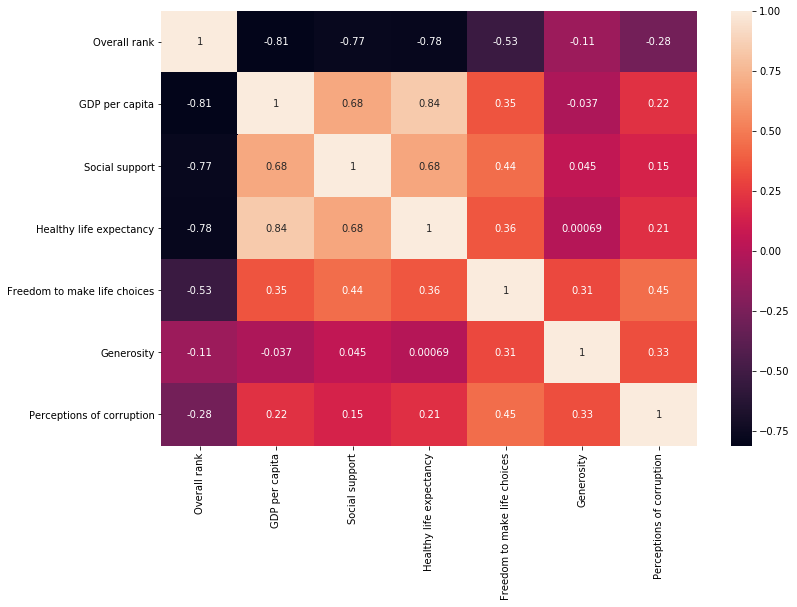

In [201]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

plt.show()

##### To implement a Linear Regression model, the assumptions of Normality, Linearity, Homoscacity, Multicollinearity, Auto correlation should be satisfied

##### Building an OLS model to check the significance of the features and check for other assumptions

In [140]:
df.columns

Index(['Overall rank', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [141]:
import statsmodels.api as sm

x=df.drop('Overall rank',1)
y=df["Overall rank"]

x_const=sm.add_constant(x)

ols_model=sm.OLS(y,x_const).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     96.19
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.05e-48
Time:                        10:17:39   Log-Likelihood:                -691.77
No. Observations:                 156   AIC:                             1398.
Df Residuals:                     149   BIC:                             1419.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          103.8211     12.052      8.615      0.000      80.007     127.635
GDP per capita                 -44.7606      8.444     -5.301      0.000     -61.445     -28.076
Social support                 -39.6642      7.495     -5.292      0.000     -54.475     -24.854
Healthy life expectancy        -35.8360     13.201     -2.715      0.007     -61.922      -9.750
Freedom to make life choices   -80.0757     20.653     -3.877      0.000    -120.886     -39.266
Generosity                      -7.8916      7.024     -1.124      0.263     -21.771       5.988
Perceptions of corruption       -0.8605      3.792     -0.227      0.821      -8.353       6.632
==============================================================================
Omnibus:                        2.108   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.710
Skew:                           0.240   Prob(JB):                        0.425
Kurtosis:                       3.182   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Report Analysis:
------------------

1. "Perceptions of corruption","Generosity" is insignificant as p-value>0.05

2. Skew is 0.2 which means that the residue is normal. Hence, Normality is satisfied

3. There is no Auto correlation as the Durbin-Watson: is 1.6 (Between 1.5 and 2.5)
    
4. No Multi-collinearity as Cond. No. is 36.9 (<1000)

5. Accuracy of the model is : R-squared=0.79.5

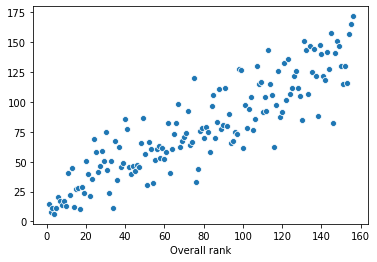

In [142]:
# Checking for Linearity

sns.scatterplot(y,ols_model.predict()) # Model is linear

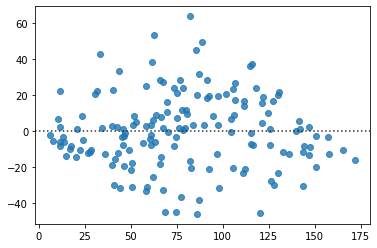

In [143]:
# Check for Homoscadacity: Model should have uniform variance

sns.residplot(ols_model.predict(),ols_model.resid) # Can't infer from the graph, lets go for a statistical test for Homoscadacity


In [144]:
from statsmodels.stats.api import het_goldfeldquandt

# H0: Data is homoscadastic; Ha: Data is not homoscadastic

het_goldfeldquandt(ols_model.resid,ols_model.model.exog)

(1.076158446584078, 0.37899981311318853, 'increasing')

In [145]:
df.drop("Perceptions of corruption",1,inplace=True)

In [146]:
x=df.drop('Overall rank',1)
y=df["Overall rank"]

x_const=sm.add_constant(x)

ols_model=sm.OLS(y,x_const).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           9.49e-50
Time:                        10:20:03   Log-Likelihood:                -691.80
No. Observations:                 156   AIC:                             1396.
Df Residuals:                     150   BIC:                             1414.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          104.4249     11.717      8.912      0.000      81.273     127.577
GDP per capita                 -44.9641      8.369     -5.373      0.000     -61.501     -28.427
Social support                 -39.4117      7.389     -5.334      0.000     -54.011     -24.812
Healthy life expectancy        -35.9395     13.151     -2.733      0.007     -61.925      -9.953
Freedom to make life choices   -81.7030     19.306     -4.232      0.000    -119.851     -43.555
Generosity                      -8.2774      6.794     -1.218      0.225     -21.701       5.146
==============================================================================
Omnibus:                        2.260   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.846
Skew:                           0.248   Prob(JB):                        0.397
Kurtosis:                       3.195   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
df.drop("Generosity",1,inplace=True)

In [148]:
x=df.drop('Overall rank',1)
y=df["Overall rank"]

x_const=sm.add_constant(x)

ols_model=sm.OLS(y,x_const).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall rank   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.54e-50
Time:                        10:20:52   Log-Likelihood:                -692.57
No. Observations:                 156   AIC:                             1395.
Df Residuals:                     151   BIC:                             1410.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          110.3698     10.670     10.344      0.000      89.289     131.451
GDP per capita                 -43.9151      8.338     -5.267      0.000     -60.390     -27.440
Social support                 -39.2999      7.400     -5.311      0.000     -53.921     -24.679
Healthy life expectancy        -36.2678     13.170     -2.754      0.007     -62.289     -10.247
Freedom to make life choices   -89.5954     18.216     -4.918      0.000    -125.587     -53.603
==============================================================================
Omnibus:                        2.759   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.316
Skew:                           0.278   Prob(JB):                        0.314
Kurtosis:                       3.216   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is 79.3% accurate from the r2_score. 

##### Let's now implement Linear Regression with the SKLEARN library. If the model is overfit we can regularize the model using Ridge, Lasso or ElasticNet.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [149]:
# Scaling the data

sc=StandardScaler()

x_scaled=sc.fit_transform(x)

x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

x_scaled.head()


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,1.063976,1.567826,1.128489,1.595521
1,1.454475,1.513863,1.075167,1.636461
2,1.182936,1.556999,1.103879,1.611881
3,1.162247,1.855397,1.292559,1.562869
4,1.361375,1.338835,1.345881,1.425088


In [150]:
'''Implementing K-Fold cross validation to check the avg. Bias Error and Variance Error 
with the scoring parameter "neg_mean_squared_error" '''

lr=LinearRegression()

score=cross_val_score(lr,x_scaled,y,cv=5,scoring="neg_mean_squared_error")

print(f' Average Bias Error is {np.mean(score)}',"\n")

print(f' Variance Error is {np.std(score,ddof=1)}')

 Average Bias Error is -569.971297329809 

 Variance Error is 225.50890710405687


In [74]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [151]:
score_accuracy=cross_val_score(lr,x_scaled,y,cv=5,scoring="r2")

print(f' Accuracy score for the different folds is  {score_accuracy}',"\n")

print(f' Average Accuracy is {np.mean(score_accuracy)}',"\n")

print(f' Average Bias Error  is {np.mean(1-score_accuracy)}',"\n")

print(f' Variance Error is {np.std(score_accuracy,ddof=1)}')

 Accuracy score for the different folds is  [-9.5320077  -3.19778096 -3.87385766 -6.04323478 -7.28516198] 

 Average Accuracy is -5.986408615536295 

 Average Bias Error  is 6.986408615536294 

 Variance Error is 2.573935610520602


### Preparing the test dataset for testing the Linear Regression model. This is the data for the year 2019

In [166]:
df_test=pd.read_csv("C:/Users/dell/Desktop/Projects/World Happiness Report/2019.csv")

df_test=df_test[['Overall rank', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices']].copy()


In [167]:
for i in ['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices']:
    df_test.loc[df_test[i]==0,i]=df_test[i].quantile(0.1)

In [169]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

social_support,social_support_lam_test=boxcox(df_test["Social support"])

life_Choices,life_choices_lam_test=boxcox(df_test["Freedom to make life choices"])



In [170]:
sc=StandardScaler()

scaled_param_values=sc.fit(x)

In [171]:
df_test.head()

,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,1,1.340,1.587,0.986,0.596
1,2,1.383,1.573,0.996,0.592
2,3,1.488,1.582,1.028,0.603
3,4,1.380,1.624,1.026,0.591
4,5,1.396,1.522,0.999,0.557


In [172]:
xtest=df_test.drop(["Overall rank"],1)
ytest=df["Overall rank"]

xtest_scaled=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

#### Testing Linear Regression on test data

In [173]:
lr=LinearRegression()

model=lr.fit(x_scaled,y)

ypred=model.predict(xtest_scaled)

r2_score(ytest,ypred)

-6.02523838643561

#### The accuracy scores of the model is very poor. Hence, no amount of tuning will give a great result. Hence not opting for model regularization. We can test other models and compare the accuracy scores.

### KNN Model

In [204]:
#  PREPARING THE TRAIN AND TEST DATA AGAIN AS SOME OF THE FEATURES WERE DROPPED WHEN TRAINING THE LINEAR REGRESSION MODEL
# =========================================================================================================================

df=pd.read_csv("C:/Users/dell/Desktop/Projects/World Happiness Report/2018.csv")

df.drop(["Country or region","Score"],1,inplace=True)

# Null Value Imputation

df.loc[df["Perceptions of corruption"].isnull(),"Perceptions of corruption"]=df["Perceptions of corruption"].quantile(0.5)

for i in ['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']:
    df.loc[df[i]==0,i]=df[i].quantile(0.1)

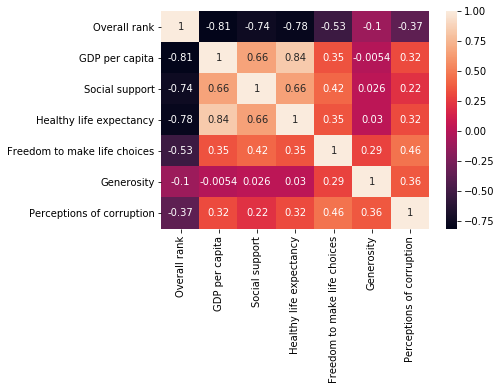

In [206]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [207]:
sc=StandardScaler()

xtrain=df.drop("Overall rank",1)
ytrain=df["Overall rank"]

xtrain_sc=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)



In [212]:
df2=pd.read_csv("C:/Users/dell/Desktop/Projects/World Happiness Report/2019.csv")

df2.drop(["Country or region","Score"],1,inplace=True)

# Null Value Imputation

df2.loc[df2["Perceptions of corruption"].isnull(),"Perceptions of corruption"]=df2["Perceptions of corruption"].quantile(0.5)

for i in ['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']:
    df2.loc[df2[i]==0,i]=df2[i].quantile(0.1)

In [216]:
sc=StandardScaler()

sc.fit(xtrain)

xtest=df2.drop("Overall rank",1)
ytest=df2["Overall rank"]

xtest_sc=sc.transform(xtest)

In [174]:
from sklearn.neighbors import KNeighborsRegressor

In [238]:
knn=KNeighborsRegressor()

params={"n_neighbors":range(1,100),"weights":['uniform',"distance"]}

grid=GridSearchCV(knn,param_grid=params,cv=3,scoring="neg_mean_squared_error")

grid.fit(xtrain_sc,ytrain)

grid.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [239]:
grid.best_score_

-2026.4523980731376

In [240]:
knn=KNeighborsRegressor(n_neighbors=5,weights="distance")

score=cross_val_score(knn,xtrain_sc,ytrain,cv=5,scoring="neg_mean_squared_error")

print(f' Average Bias error is {np.mean(score)}',"\n")

print(f' Variance Error is {np.std(score,ddof=1)}')

 Average Bias error is -1087.3793528164274 

 Variance Error is 508.14763165192585


In [248]:
knn=KNeighborsRegressor(n_neighbors=5,weights="distance")

model=knn.fit(xtrain_sc,ytrain)

ypred=model.predict(xtest_sc)

r2_score(ytest,np.round(ypred))

0.8289801014682872

In [246]:
pd.concat([pd.Series(ytest),pd.Series(ypred)],1)

,Overall rank,0
0,1,11.713641
1,2,10.740616
2,3,8.925036
3,4,13.110331
4,5,11.342258
...,...,...
151,152,126.069281
152,153,121.878046
153,154,146.825714
154,155,141.665691


#### KNN gives a accuracy of 82.89% 

### Decision Tree

In [229]:
from sklearn.tree import DecisionTreeRegressor

In [253]:
DT=DecisionTreeRegressor()

params={"max_depth":range(1,50),"criterion":["mse"]}

grid=GridSearchCV(DT,param_grid=params,cv=3,scoring="neg_mean_squared_error")

grid.fit(xtrain_sc,ytrain)

grid.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [231]:
grid.best_score_

-1838.5764956780686

In [254]:
DT=DecisionTreeRegressor(max_depth=5)

model=DT.fit(xtrain_sc,ytrain)

ypred=model.predict(xtrain_sc)

r2_score(ytrain,ypred)

0.9165417601124323

In [256]:
model=DT.fit(xtrain_sc,ytrain)

ypred=model.predict(xtest_sc)

r2_score(ytest,ypred)

0.5572390137288459

#### The Decision Tree model is clearly Overfitted and the performance is very poor: Accuracy is 55.7%

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

In [235]:
GB=GradientBoostingRegressor()

params={"n_estimators":range(1,150)}

grid=GridSearchCV(GB,params,cv=4,scoring="neg_mean_squared_error")

grid.fit(xtrain_sc,ytrain)

grid.best_params_

{'n_estimators': 132}

In [250]:
GB=GradientBoostingRegressor(n_estimators=132)

model=GB.fit(xtrain_sc,ytrain)

ypred=model.predict(xtest_sc)

r2_score(ytest,ypred)

0.7361217661786474

#### Accuracy is 73.6% with XG Boost as well

### Random Forest Model

In [257]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

params={"n_estimators":range(1,100)}

grid=GridSearchCV(RF,params,cv=3,scoring="neg_mean_squared_error")

grid.fit(xtrain_sc,ytrain)

grid.best_params_


{'n_estimators': 3}

In [259]:
RF=RandomForestRegressor(n_estimators=3)

model=RF.fit(xtrain_sc,ytrain)

ypred=model.predict(xtest_sc)

r2_score(ytest,ypred)

0.6057590014031353

#### Accuracy of RandomForest is 60.57%

#### KNN gives the best accuracy scores. This can be further bagged or boosted to improve the performance.



In [268]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor

boost=AdaBoostRegressor(base_estimator=knn)

params={"n_estimators":range(1,100)}

grid=GridSearchCV(boost,params,cv=3,scoring="neg_mean_squared_error")

grid.fit(xtrain_sc,ytrain)

grid.best_params_


{'n_estimators': 43}

In [270]:
grid.best_score_

-1887.8761355437257

In [269]:
boost=AdaBoostRegressor(n_estimators=43,base_estimator=knn)

boost.fit(xtrain_sc,ytrain)

ypred=boost.predict(xtest_sc)

r2_score(ytest,ypred)

0.8130444049184281

#### Boosted KNN model has an accuracy of 81.3%

In [278]:
bag=BaggingRegressor(base_estimator=knn,random_state=5)

params={"n_estimators":range(1,100)}

grid=GridSearchCV(bag,params,cv=3,scoring="neg_mean_squared_error")

grid.fit(xtrain_sc,ytrain)

grid.best_params_

{'n_estimators': 12}

In [272]:
grid.best_score_

-1975.7747025181027

In [279]:
bag=BaggingRegressor(n_estimators=12,base_estimator=knn,random_state=5)

bag.fit(xtrain_sc,ytrain)

ypred=bag.predict(xtest_sc)

r2_score(ytest,ypred)

0.8220247692050884

#### Bagged KNN gives an accuracy of 82.20%

In [281]:
Accuracy_Scores=pd.DataFrame({"ML_model":["KNN","Bagged_KNN","Boosted_KNN","RandomForest","XG_Boost","Decision Tree"],"Accuracy_%age":[82.89,82.20,81.3,60.57,73.6,55.7]})

In [282]:
Accuracy_Scores

,ML_model,Accuracy_%age
0,KNN,82.89
1,Bagged_KNN,82.20
2,Boosted_KNN,81.30
3,RandomForest,60.57
4,XG_Boost,73.60
5,Decision Tree,55.70
